# Bar Graph Examples

Teng-Jui Lin

- Created: 2023-05-27
- Edited: 2024-05-28

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Nonzero y-minimum

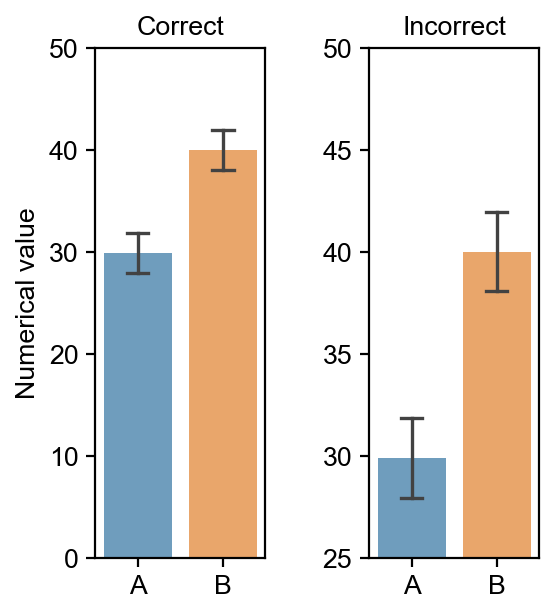

In [2]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(30, 2, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(40, 2, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B']
bar_df = swarm_df

col = 2
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
for i in range(col):
    sns.barplot(
        bar_df,
        errorbar=BAR_ERRORBAR,
        capsize=BAR_CAPSIZE,
        linewidth=BAR_LINEWIDTH,
        edgecolor=BAR_EDGECOLOR,
        alpha=BAR_ALPHA,
        width=BAR_WIDTH,
        ax=axs[i],
    )
    axs[i].set_box_aspect(3)
axs[0].set_ylim(0, 50)
axs[1].set_ylim(25, 50)
axs[0].set_title('Correct')
axs[1].set_title('Incorrect')
axs[0].set_ylabel('Numerical value')
plt.tight_layout()

## log y-axis of numerical value

In [3]:
def mean_bar(df, ax, width=0.1, color='k'):
    LINEWIDTH = 1
    for i in range(df.shape[1]):
        if type(color) == str:
            mean_color = color
            error_color = color
        elif type(color) == list:
            mean_color=color[i]
            error_color = color[i]
        else:
            pass
        ax.hlines(
            y=df.mean()[i],
            xmin=i-width,
            xmax=i+width,
            color=mean_color,
            zorder=100,
            linewidth=LINEWIDTH,
        )
        ax.errorbar(
            x=df.columns[i], 
            y=df.mean()[i], 
            yerr=df.std()[i], 
            capsize=5, 
            capthick=LINEWIDTH,
            color=error_color,
            zorder=100,
            linewidth=LINEWIDTH,
        )
    ax.set_xlim(-0.5, df.shape[1]-0.5)

In [4]:
def bar_plot(df, ax):
    sns.barplot(
        df,
        errorbar=BAR_ERRORBAR,
        capsize=BAR_CAPSIZE,
        linewidth=BAR_LINEWIDTH,
        edgecolor=BAR_EDGECOLOR,
        alpha=BAR_ALPHA,
        width=BAR_WIDTH,
        ax=ax,
        err_kws=dict(linewidth=1),
    )

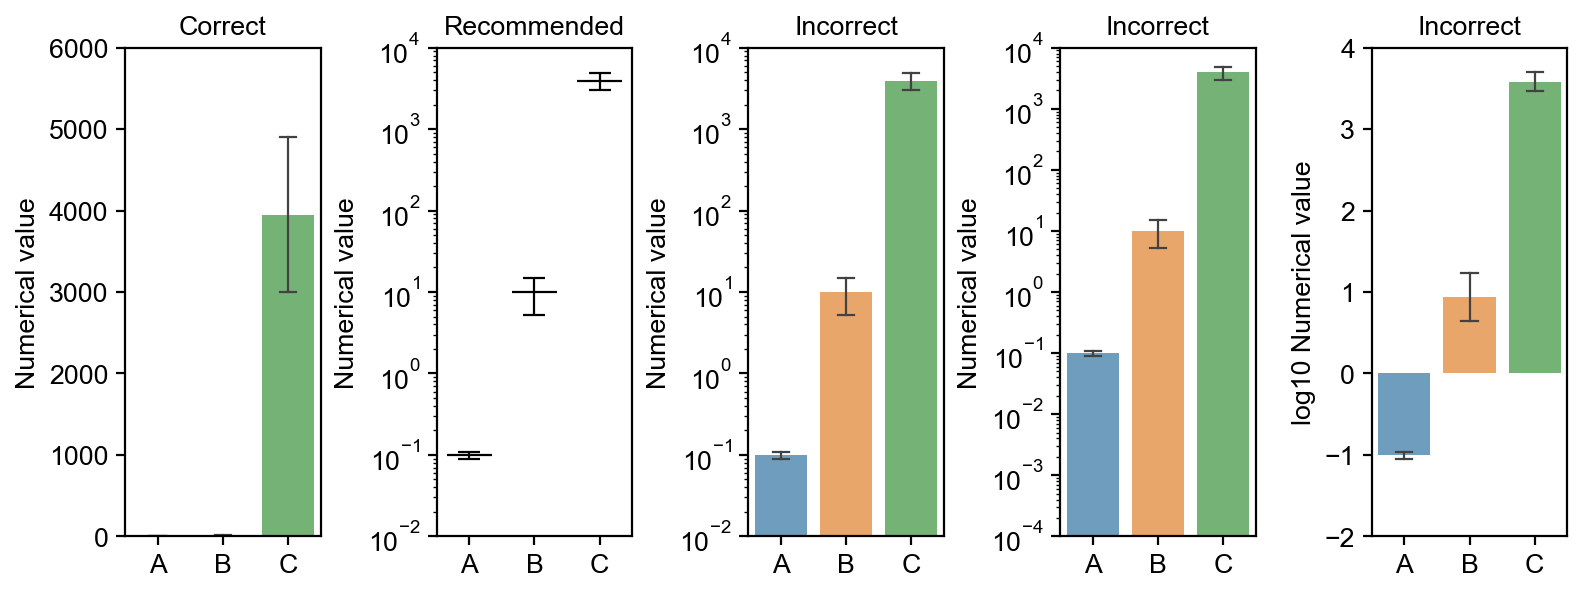

In [5]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.1, 0.01, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(10, 5, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(4000, 1000, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 5
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(bar_df, axs[2])
bar_plot(bar_df, axs[3])
bar_plot(np.log10(bar_df), axs[4])

for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].set_ylim(0, 6000)
axs[1].set_ylim(1e-2, 1e4)
axs[2].set_ylim(1e-2, 1e4)
axs[3].set_ylim(1e-4, 1e4)
axs[4].set_ylim(-2, 4)

axs[1].set_yscale('log')
axs[2].set_yscale('log')
axs[3].set_yscale('log')

axs[0].set_title('Correct')
axs[1].set_title('Recommended')
axs[2].set_title('Incorrect')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')

axs[0].set_ylabel('Numerical value')
axs[1].set_ylabel('Numerical value')
axs[2].set_ylabel('Numerical value')
axs[3].set_ylabel('Numerical value')
axs[4].set_ylabel('log10 Numerical value')
plt.tight_layout()

## log y-axis of fold changes (relative)

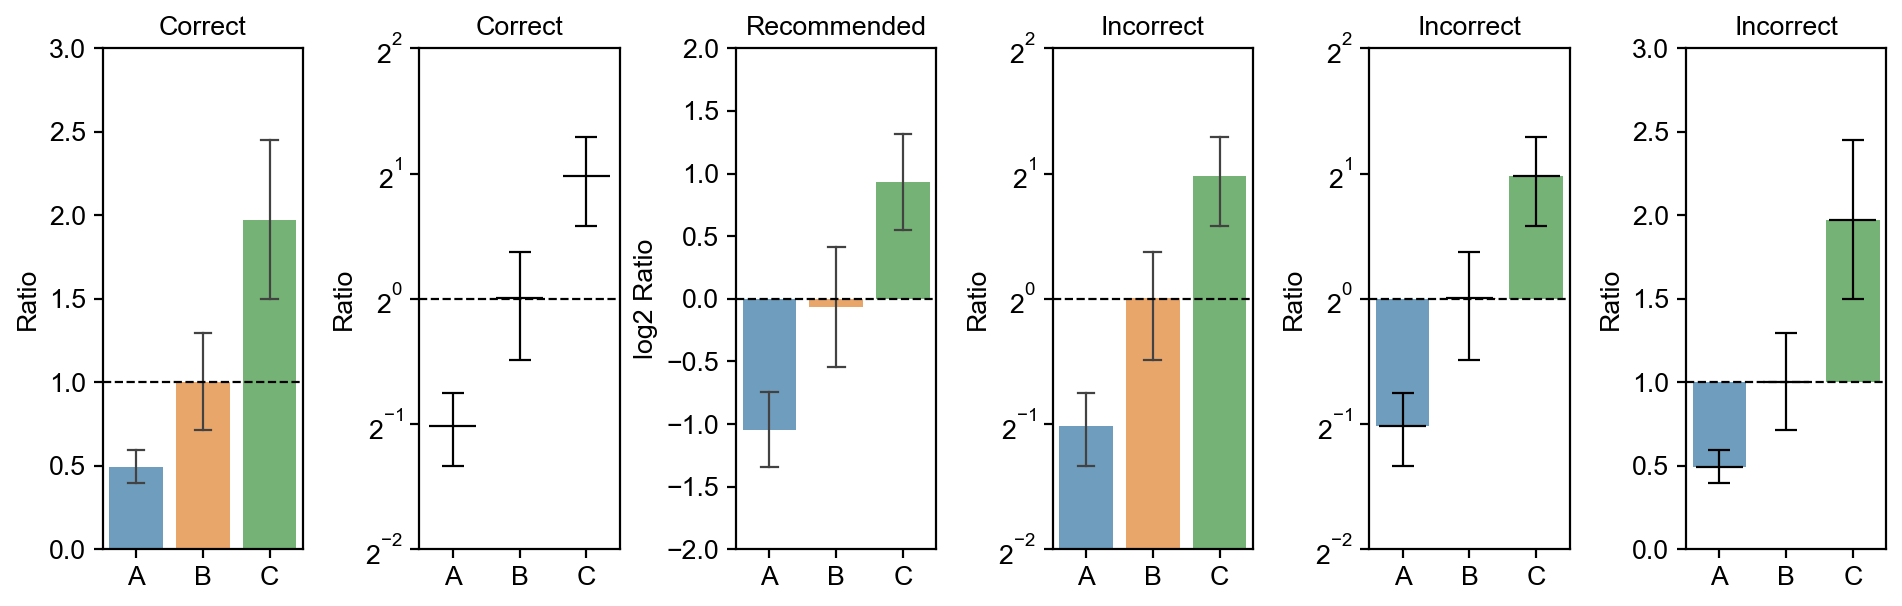

In [6]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.5, 0.1, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(1, 0.3, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(2, 0.5, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 6
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(np.log2(bar_df), axs[2])
bar_plot(bar_df, axs[3])
mean_bar(bar_df, ax=axs[4], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[4],
)

mean_bar(bar_df, ax=axs[5], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[5],
)

for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].axhline(1, color='k', lw=1, ls='--')
axs[1].axhline(1, color='k', lw=1, ls='--')
axs[2].axhline(0, color='k', lw=1, ls='--')
axs[3].axhline(1, color='k', lw=1, ls='--')
axs[4].axhline(1, color='k', lw=1, ls='--')
axs[5].axhline(1, color='k', lw=1, ls='--')

axs[0].set_ylim(0, 3)
axs[1].set_ylim(2**(-2), 2**2)
axs[2].set_ylim(-2, 2)
axs[3].set_ylim(2**(-2), 2**2)
axs[4].set_ylim(2**(-2), 2**2)
axs[5].set_ylim(0, 3)

axs[1].set_yscale('log', base=2)
axs[3].set_yscale('log', base=2)
axs[4].set_yscale('log', base=2)

axs[0].set_title('Correct')
axs[1].set_title('Correct')
axs[2].set_title('Recommended')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')

axs[0].set_ylabel('Ratio')
axs[1].set_ylabel('Ratio')
axs[2].set_ylabel('log2 Ratio')
axs[3].set_ylabel('Ratio')
axs[4].set_ylabel('Ratio')
axs[5].set_ylabel('Ratio')
plt.tight_layout()

## log y-axis of fold changes (absolute)

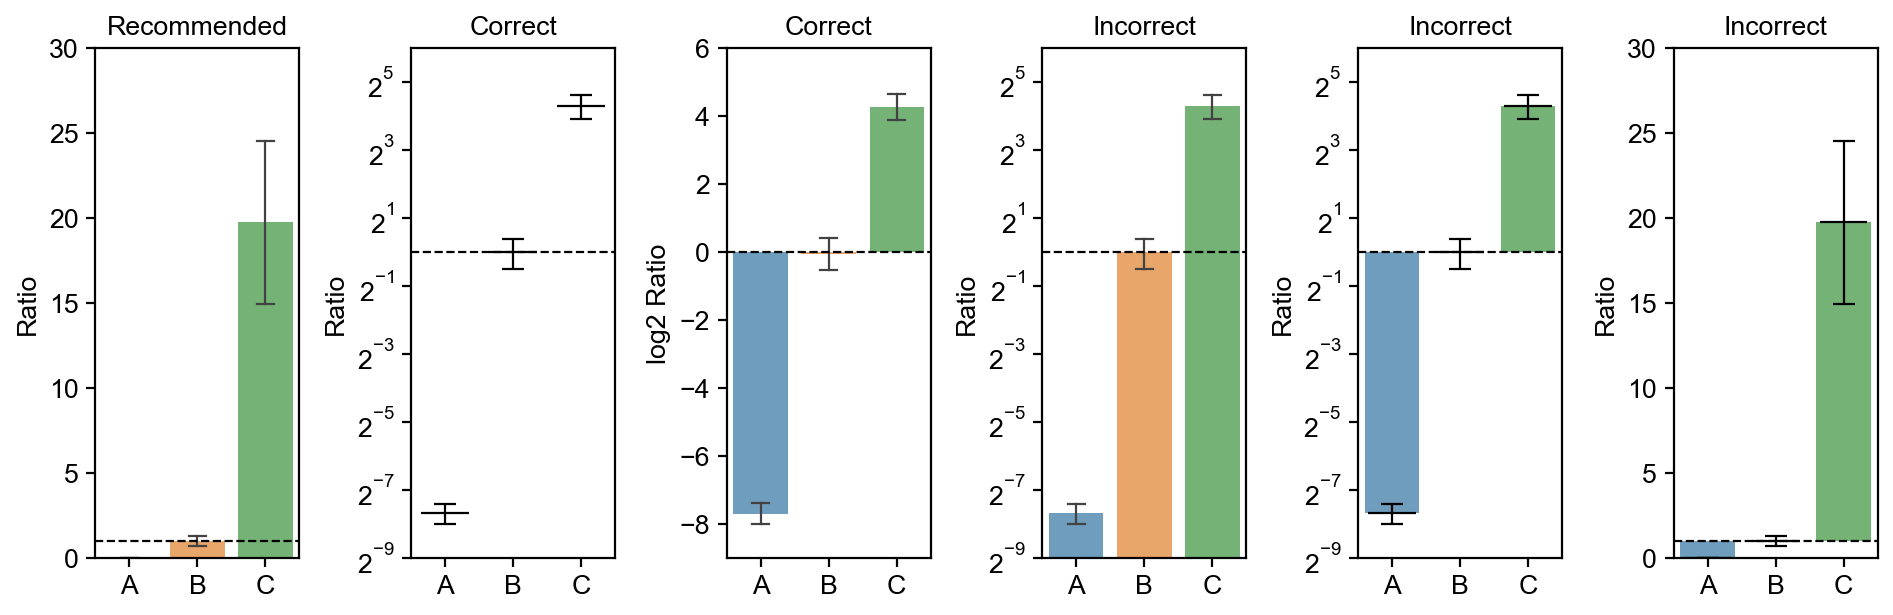

In [7]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.005, 0.001, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(1, 0.3, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(20, 5, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 6
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(np.log2(bar_df), axs[2])
bar_plot(bar_df, axs[3])

mean_bar(bar_df, ax=axs[4], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[4],
)

mean_bar(bar_df, ax=axs[5], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[5],
)


for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].axhline(1, color='k', lw=1, ls='--')
axs[1].axhline(1, color='k', lw=1, ls='--')
axs[2].axhline(0, color='k', lw=1, ls='--')
axs[3].axhline(1, color='k', lw=1, ls='--')
axs[4].axhline(1, color='k', lw=1, ls='--')
axs[5].axhline(1, color='k', lw=1, ls='--')

axs[0].set_ylim(0, 30)
axs[1].set_ylim(2**(-9), 2**6)
axs[2].set_ylim(-9, 6)
axs[3].set_ylim(2**(-9), 2**6)
axs[4].set_ylim(2**(-9), 2**6)
axs[5].set_ylim(0, 30)

axs[1].set_yscale('log', base=2)
axs[3].set_yscale('log', base=2)
axs[4].set_yscale('log', base=2)

axs[0].set_title('Recommended')
axs[1].set_title('Correct')
axs[2].set_title('Correct')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')

axs[0].set_ylabel('Ratio')
axs[1].set_ylabel('Ratio')
axs[2].set_ylabel('log2 Ratio')
axs[3].set_ylabel('Ratio')
axs[4].set_ylabel('Ratio')
axs[5].set_ylabel('Ratio')
plt.tight_layout()

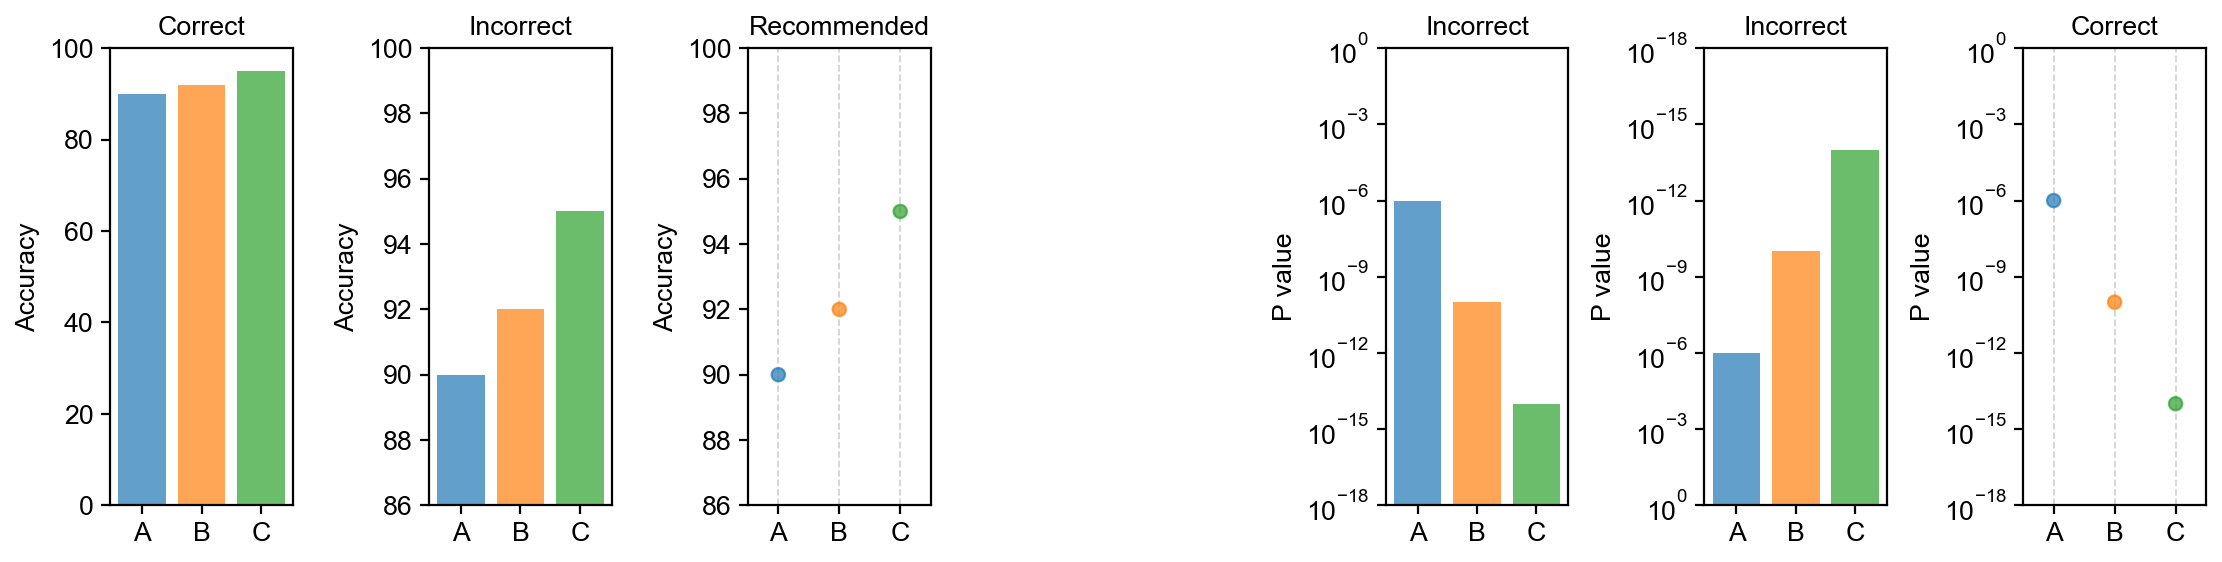

In [71]:
x = ['A', 'B', 'C']
y = np.array([-6, -10, -14])
y_linear = np.array([90, 92, 95])
colors = ['tab:blue', 'tab:orange', 'tab:green']

col = 7
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
axs[0].bar(x, y_linear, alpha=BAR_ALPHA, color=colors)
axs[1].bar(x, y_linear, alpha=BAR_ALPHA, color=colors)
axs[2].scatter(x, y_linear, alpha=BAR_ALPHA, color=colors, zorder=100)

axs[0].set_ylim(0, 100)
axs[1].set_ylim(86, 100)
axs[2].set_ylim(86, 100)

axs[2].set_xlim(-0.5, len(y)-0.5)
axs[2].grid(axis='x', zorder=-100, color='lightgray', ls='--')

axs[0].set_title('Correct')
axs[1].set_title('Incorrect')
axs[2].set_title('Recommended')

for i in range(0, 3):
    axs[i].set_box_aspect(2.5)
    axs[i].set_ylabel('Accuracy')

axs[4].bar(x, 10.**y, alpha=BAR_ALPHA, color=colors)
axs[5].bar(x, 10.**y - 1, bottom=1, alpha=BAR_ALPHA, color=colors)
axs[6].scatter(x, 10.**y, zorder=100, alpha=BAR_ALPHA, color=colors)

axs[4].set_ylim(1e-18, 1e0)
axs[5].set_ylim(1e0, 1e-18)
axs[6].set_ylim(1e-18, 1e0)

axs[6].set_xlim(-0.5, len(y)-0.5)
axs[6].grid(axis='x', zorder=-100, color='lightgray', ls='--')

axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')
axs[6].set_title('Correct')

for i in range(4, 7):
    axs[i].set_box_aspect(2.5)
    axs[i].set_yscale('log')
    axs[i].set_ylabel('P value')

axs[3].axis('off')
plt.tight_layout()

In [ ]:
x = np.arange(2004, 2015)
y = np.array([
    2250, 2550, 2590, 2480, 2320, 2210, 2190, 2210, 2110, 2030, 1980
])
plt.bar(x, y)
plt.bar(x, y-1900, bottom=1900)